# exploring relationship

In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

path = '/Users/malavica/Library/CloudStorage/OneDrive-Personal/Documents/careerfoundry/E-COMMERCE'

# Try different encodings if 'ISO-8859-1' doesn't work
encoding_type = 'ISO-8859-1'
df = pd.read_csv(os.path.join(path,'fact_table.csv'), index_col=False)
df_customer = pd.read_csv(os.path.join(path, 'customer_dim.csv'), index_col=False, encoding=encoding_type)
df_item = pd.read_csv(os.path.join(path, 'item_dim.csv'), index_col=False, encoding=encoding_type)
df_store = pd.read_csv(os.path.join(path, 'store_dim.csv'), index_col=False, encoding=encoding_type)
df_time = pd.read_csv(os.path.join(path,'time_dim.csv'), index_col=False)
df_trans = pd.read_csv(os.path.join(path,'Trans_dim.csv'), index_col=False)


In [2]:
df.head()

,payment_key,coustomer_key,time_key,item_key,store_key,quantity,unit,unit_price,total_price
0,P026,C004510,T049189,I00177,S00307,1,ct,35.0,35.0
1,P022,C008967,T041209,I00248,S00595,1,rolls,26.0,26.0
2,P030,C007261,T03633,I00195,S00496,8,ct,12.5,100.0
3,P032,C007048,T084631,I00131,S0086,8,ct,14.0,112.0
4,P014,C006430,T071276,I00050,S00488,8,cans,8.0,64.0


payment_key       object
coustomer_key     object
time_key          object
item_key          object
store_key         object
quantity           int64
unit              object
unit_price       float64
total_price      float64
dtype: object


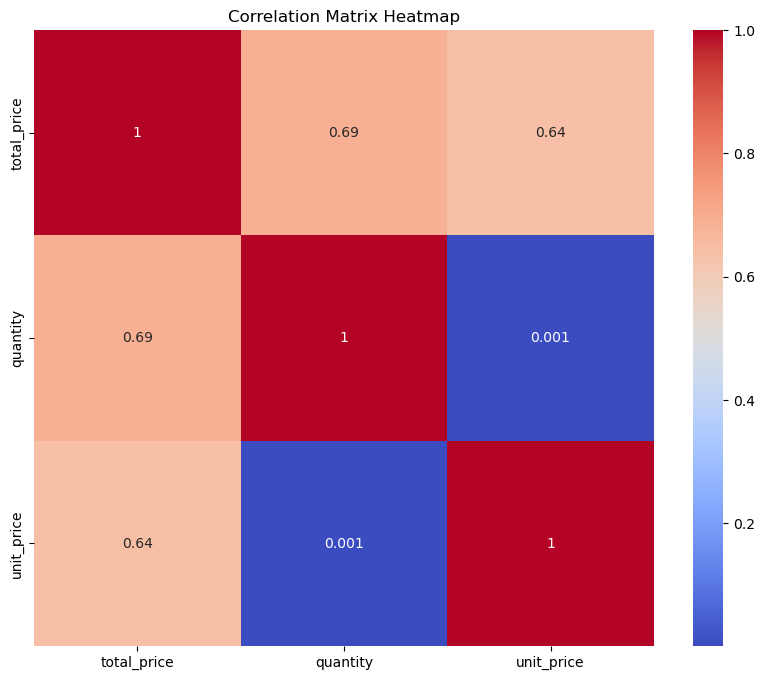

In [4]:
# Check data types of the columns
print(df.dtypes)

# Convert non-numeric columns to numeric if applicable, or choose only numeric columns
# Example: df['some_column'] = pd.to_numeric(df['some_column'], errors='coerce')

# Assuming 'total_price', 'quantity', and 'unit_price' are numeric columns
# Re-run the correlation matrix heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df[['total_price', 'quantity', 'unit_price']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


# - Correlation coefficient between `total_price` and `quantity` is 0.69, moderate positive relationship.
As quantity increases, the total price tends to increase as well, 
which is expected because the more items purchased, the higher the total price would generally be.
- The correlation between `total_price` and `unit_price` is 0.64, which also indicates a 
moderate positive correlation. This suggests that higher-priced items contribute to a higher total price.

- There is a negligible correlation of 0.001 between `quantity` and `unit_price`, 
which means that there is no significant linear relationship between the quantity of items sold and the
price per unit. This might imply that customers buy items in various quantities regardless of the unit price,
or that the dataset includes a wide range of products with 
different pricing scales that do not correlate with how many are bought.

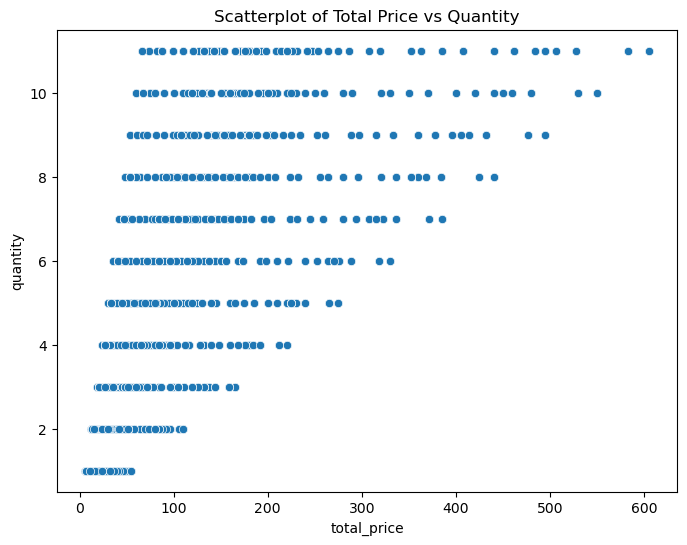

In [5]:
# Create Scatterplots for Strongly Correlated Variables
# Identifying strongly correlated pairs from the heatmap
# Here, replace 'total_price' and 'quantity' with your chosen columns
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_price', y='quantity', data=df)
plt.title('Scatterplot of Total Price vs Quantity')
plt.show()


# In this scatter plot:

- There appears to be a concentration of data points between the lower price ranges and medium quantities.
- As the total price increases, the quantity seems to generally decrease, which could indicate a trend where fewer items are bought as the price goes up. However, there is considerable scatter in the data, so this trend is not strict or necessarily linear.
- There are fewer points at the higher quantity levels across all price levels, which may suggest that high quantities are less commonly sold/purchased.

/Users/malavica/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


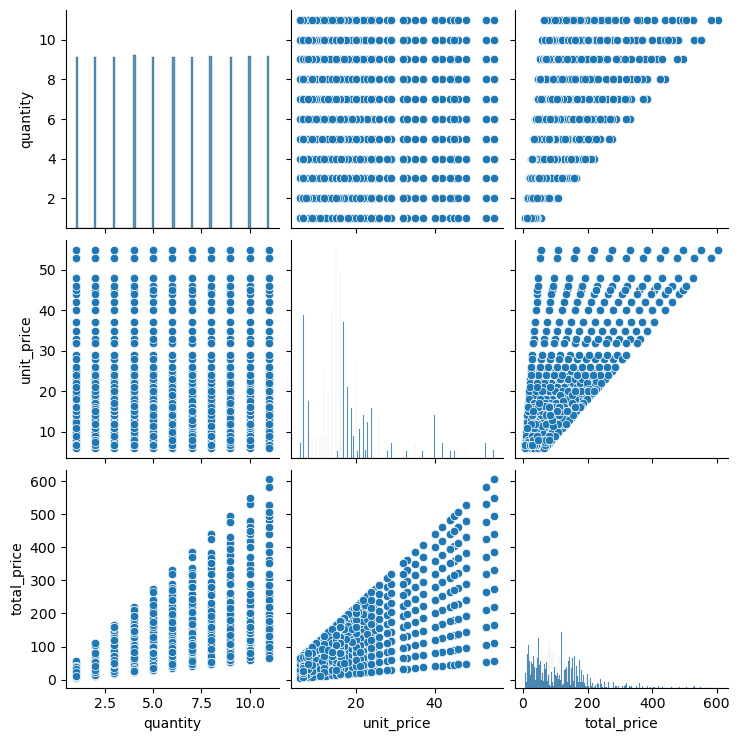

In [6]:
# Create a Pair Plot of the Entire Dataset
sns.pairplot(df)
plt.show()



Positive Correlation: These  plots suggest a positive correlation between quantity and total_price, as well as between unit_price and total_price. This is consistent with basic economic principles where total price increases with either quantity sold or the unit price of the item.

Data Distribution: there are clusters of data points at lower quantities and unit prices, which might suggest that most transactions involve smaller quantities and lower-priced items.

Potential Outliers: there's a visible spread of data points as unit_price increases, which could indicate outliers or a wide variation in how unit_price affects total_price.

Data Skewness: In the plot of quantity vs. unit_price, the data seems to be heavily concentrated at lower unit prices, suggesting that items are generally sold at lower unit prices, or that higher-priced items are sold less frequently.

In [10]:


# Assuming you have two DataFrames: df and df_time
merged_df = pd.merge(df, df_time, on='time_key', how='inner')

# 'how' parameter specifies the type of merge. 'inner' keeps only common rows.

# If you want to perform a left, right, or outer join instead, you can use 'how' accordingly:
# merged_df = pd.merge(df, df_time, on='time_key', how='left')  # Left join
# merged_df = pd.merge(df, df_time, on='time_key', how='right')  # Right join
# merged_df = pd.merge(df, df_time, on='time_key', how='outer')  # Outer join


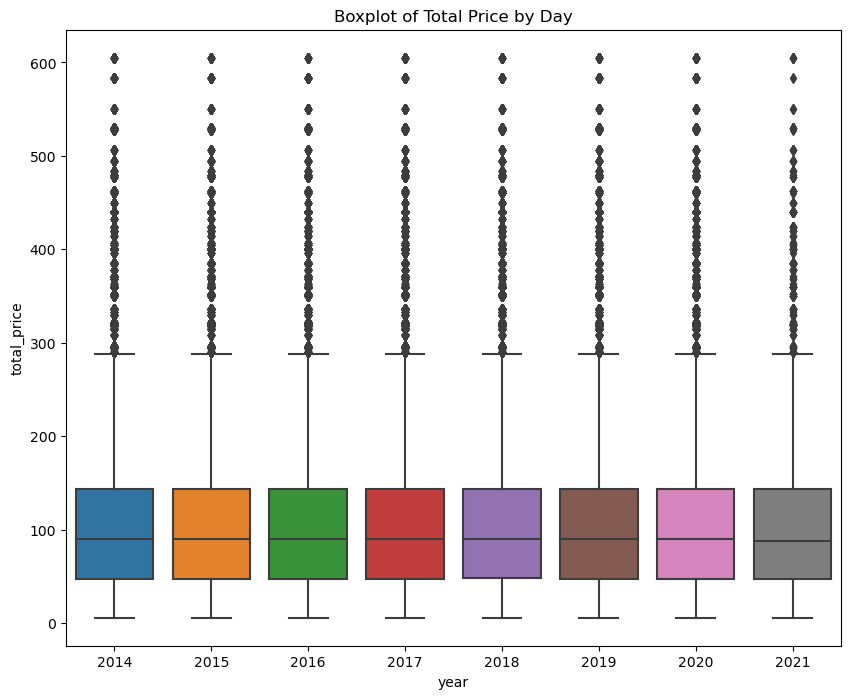

In [12]:
# Create a Categorical Plot
# Assuming 'day' is a categorical variable in your dataset
# Replace 'day' and 'total_price' with your actual categorical and continuous columns
plt.figure(figsize=(10, 8))
sns.boxplot(x='year', y='total_price',data=merged_df)
plt.title('Boxplot of Total Price by Day')
plt.show()

The consistency of the median and IQR over the years could indicate stable pricing and purchasing patterns.
The presence of outliers suggests that there are exceptional days with unusually high total sales, which could be due to special events, promotions, or seasonal sales peaks.
Since there are outliers every year, it would be useful to identify any common factors contributing to these spikes,which could be strategic opportunities for the targeted items & supplier distribution 